**ライブラリの準備**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**グラフの準備**

In [ ]:
# グラフの描画
import networkx as nx
def draw_graph(graph_name):
  pos = nx.spring_layout(graph_name, k=0.3)
  edge_labels = {(i, j): w['weight'] for i, j, w in graph_name.edges(data=True)}
  nx.draw_networkx_edge_labels(graph_name,pos, edge_labels=edge_labels)
  nx.draw_networkx(graph_name, pos, with_labels=True,node_size=100)
  print(nx.to_numpy_matrix(graph_name))

[[ 0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [ 8.  0.  2. 17.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [ 0.  2.  0. 15.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [ 0. 17. 15.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [ 0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  3.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  3.  0.  0.  6. 12.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  5.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0. 16.  0.
   0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 12.  0.  0.  0.  0.  4.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0.  5.  2.  0.  0. 

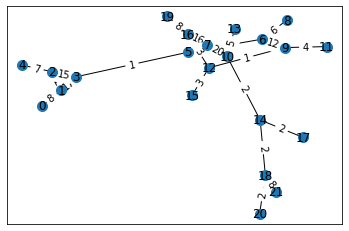

In [ ]:
H=nx.Graph()
H.add_nodes_from([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
H.add_weighted_edges_from([
                           (0,1,8),(1,2,2),(1,3,17),(2,3,15),(2,4,7),(3,5,1),(5,6,3),(5,7,5),(6,8,6),(6,9,12),(7,16,16),(7,10,20),(9,11,4),(9,12,1),(10,13,5),(10,14,2),(12,15,3),(12,16,3),(14,17,2),(14,18,2),(18,20,2),(18,21,8),(16,19,8)
])
draw_graph(H)

**式の準備**

In [ ]:
def prepare_graph(graph_name):
  nnodes=nx.number_of_nodes(graph_name)
  edge_list=list(graph_name.edges)
  nbr_mtx=nx.to_numpy_matrix(graph_name)
  return nnodes,edge_list,nbr_mtx

In [ ]:
 def gaussian_elimination(A, b):
    n = len(b)
 
    # 前進消去を行う
    for i in range(n):
        pivot = A[i, i]                 # 対角成分をpivotに代入
        A[i] = A[i] / pivot             # pivotで係数行列を割り、A[i,i]を1にする
        b[i] = b[i] / pivot             # 定数ベクトルもpivotで割り同値変形する
 
        # i行目の定数倍をi+1行目以降から引くループ
        for j in range(i+1, n):
            p = A[j, i]                 # i+1行目以降i列の数値を格納
            A[j] -= p * A[i]            # 係数行列のi+1行目からi行目の定数倍を引く
            b[j] -= p * b[i]            # 定数ベクトルのi+1行目からi行目の定数倍を引く
 
    # 後退代入を行う
    x = np.zeros(n)                     # 解の入れ物を用意
    for i in reversed(range(n)):        # 最終行から後退処理する
        x[i] = b[i] / A[i, i]           # 解を求める
        for j in range(i):
            b[j] -= A[j, i] * x[i]      # 解が求まった列分bの値を上から更新する
    return x
 


In [ ]:
def prepare_param(num_t,num_nodes):
  conductivity=np.zeros((nt,nnodes,nnodes)) #D
  length=np.zeros((nnodes,nnodes)) #L
  pressure=np.zeros((nt,nnodes)) #p
  flux=np.zeros(nnodes) #Q
  return conductivity,length,pressure,flux

In [ ]:
#ゼロ除算が発生しないように非ゼロ要素のみで割り算を行う
def divide_non_zero_element(D,L,num_nodes,list_edges):
    X=np.zeros((num_nodes,num_nodes))
    for i,j in list_edges:
        X[i,j]=D[i,j]/L[i,j]
        X[j,i]=D[j,i]/L[j,i]
    return X

#f(Q) for dD/dt 
def f(x):
    powered=x**gamma
    return powered
    #powered/(powered+1)

def derivation_of_Q(X,p):
    #assert not np.isnan(p).any(),p
    Q = np.multiply(X,np.expand_dims(p,axis=1)-p)
    return Q

#Dの時間変化量を求める
def ans(D,L,p,num_nodes,list_edges):
    X=divide_non_zero_element(D,L,num_nodes,list_edges)
    #assert not np.isnan(X).any(),X
    Q = derivation_of_Q(X,p)
    ans=f(np.abs(Q))
    return ans

#一次連立方程式を解きpを求める
def deduce_p(D,L,B,num_nodes,list_edges):
    Y=divide_non_zero_element(D,L,num_nodes,list_edges)
    A=np.diag(np.sum(Y,axis=1)) - Y
    #assert (np.diag(Y)==0).all()
    #assert (np.diag(A)!=0).all(),[np.sum(Y,axis=1),np.diag(Y)]
    #assert not np.isnan(A).any(),A
    p=gaussian_elimination(A.T,B)
    #p = np.linalg.solve(A,B)
    return p

In [ ]:
#繰り返し計算する
def calculate(D,L,p,flux,num_nodes,list_edges):
    Q_sum = []
    for t in range(0,nt-1):
        Q = ans(D[t],L,p[t],num_nodes,list_edges)
        # assert not np.isnan(Q).any(),[t,Q]
        Q_sum.append(Q)        
        #print("t={}のときQ={}".format(t,Q))
        #D[t+1] = D[t] + dt*(ans(D[t],L,p[t],num_nodes,list_edges)-r*D[t])
        D[t+1] = Q
        p[t+1] = deduce_p(D[t+1],L,flux,num_nodes,list_edges)

    return Q_sum

**初期値の設定**

In [ ]:
I0=1.0
gamma=1.0
#gamma=1.8
nt=20
dt=1.020
r=1.0

In [ ]:
nnodes,edge_list,nbr_mtx = prepare_graph(H)

In [ ]:
conductivity,length,pressure,flux = prepare_param(nt,nnodes)

**計算**

In [ ]:
#初期値と定数の設定
conductivity[0]=np.random.uniform(0.5,1.0,(nnodes,nnodes)) #Dの初期値
length=nbr_mtx 
flux[0]=-I0
flux[19]=I0
pressure[0]=deduce_p(conductivity[0],length,flux,nnodes,edge_list) #pの初期値

In [ ]:
from time import time
start_time = time()
Q = calculate(conductivity,length,pressure,flux,nnodes,edge_list)
proc_time = time() - start_time
print("実行時間は：", proc_time,"秒")

実行時間は： 0.1594996452331543 秒


**結果の表示**

In [ ]:
#P_ = pd.DataFrame(pressure[-1])
#P_.to_csv('result_p_100.csv')

In [ ]:
Q_ = pd.DataFrame(Q[-1])
Q_.to_csv('result_100.csv')

In [ ]:
Q_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.000000e+00,3.408763e+22,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,4.825397e+22,0.000000e+00,7.125480e+33,2.688851e+19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,8.236997e+33,0.000000e+00,2.665811e+16,9.316314e+21,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,4.781558e+19,4.025149e+16,0.000000e+00,0.000000e+00,2.022200e+36,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,6.591508e+21,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.000000e+00,0.000000e+00,0.000000e+00,1.664550e+36,0.000000e+00,0.000000e+00,1.636882e+18,1.324182e+20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.704984e+18,0.000000e+00,0.000000e+00,3.409987e+19,3.350996e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.254982e+20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.923971e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.357115e+20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.609410e+19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.958112e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.622840e+19,1.345686e+36,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
